Metode unsupervised learning :
Hierarchical cluster

In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
#import dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('dataset.csv')
dataset.head()

Saving dataset.csv to dataset (1).csv


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
#menghapus colom cust_id
dataset.drop('CUST_ID', axis=1, inplace=True)

In [8]:
#pengecekan nilai null pada dataset
dataset.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS          313
CREDIT_LIMIT                1
BALANCE                     0
CASH_ADVANCE_FREQUENCY      0
PRC_FULL_PAYMENT            0
dtype: int64

In [11]:
#mengisi nilai null pada dataset dengan nilai mean kolom tersebut
dataset.loc[(dataset['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=dataset['MINIMUM_PAYMENTS'].mean()
dataset.loc[(dataset['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=dataset['CREDIT_LIMIT'].mean()

In [12]:
dataset.isnull().sum().sort_values(ascending=False).head()

BALANCE                   0
CASH_ADVANCE_FREQUENCY    0
PRC_FULL_PAYMENT          0
MINIMUM_PAYMENTS          0
PAYMENTS                  0
dtype: int64

In [13]:
#preprocesing dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

df = pd.DataFrame(scaled_data, columns= dataset.columns)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


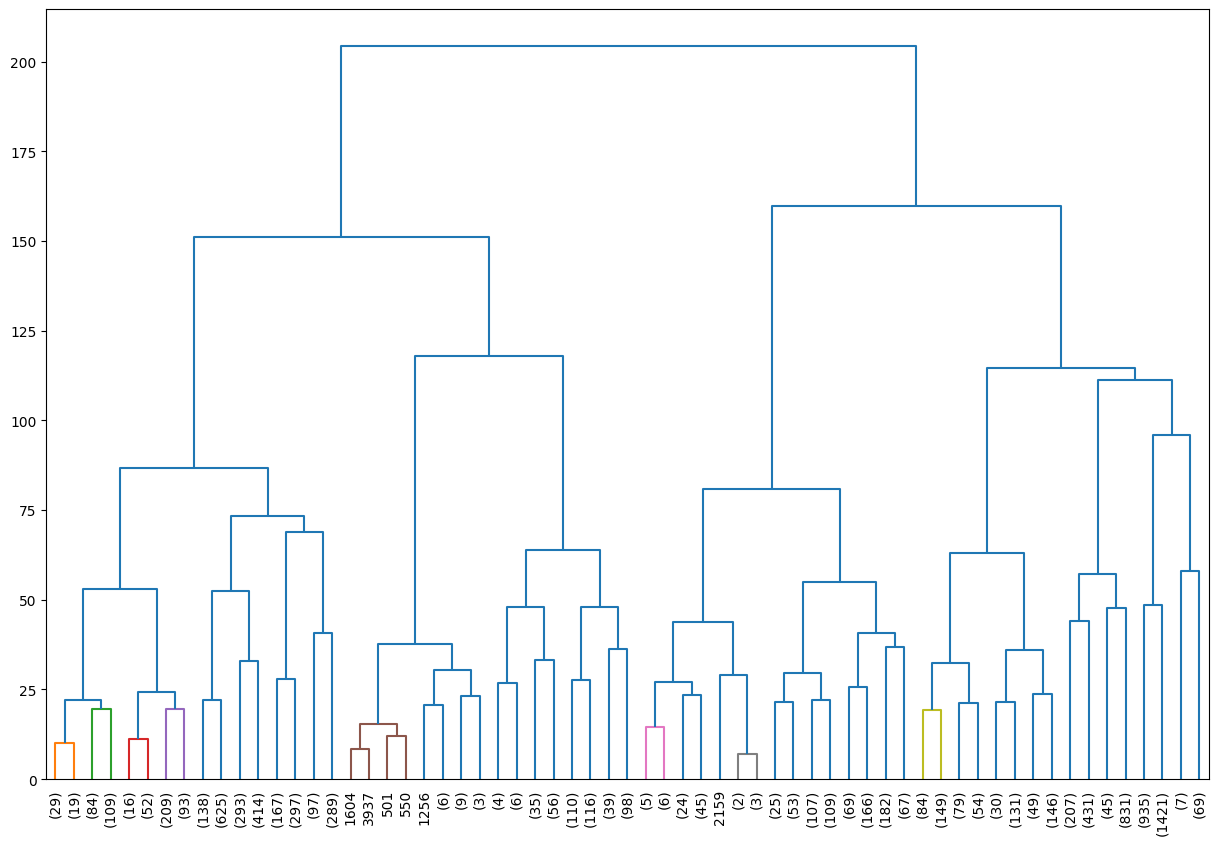

In [15]:
#visualisasi dendrogram
plt.figure(figsize=(15,10))
dendrogram(linkage(df,method="ward"), leaf_rotation=90, p=5, color_threshold=20, leaf_font_size=10, truncate_mode='level')
plt.show()

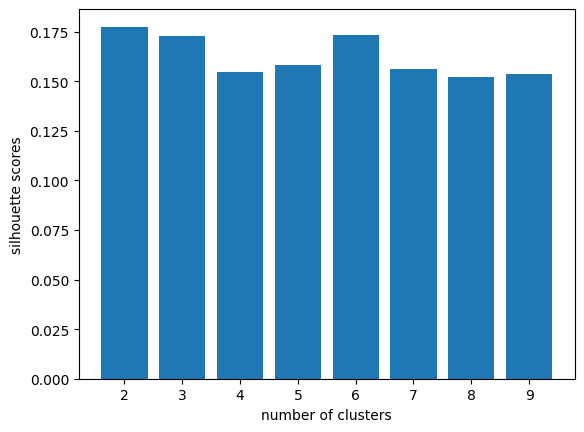

In [16]:
#mencari jumlah cluser dengan silhouette scores
silhouette_scores = []

for n_cluster in range(2, 10):
  silhouette_scores.append(silhouette_score(df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df)))

plt.bar(range(2, 10), silhouette_scores)
plt.xlabel('number of clusters', fontsize = 10)
plt.ylabel('silhouette scores', fontsize = 10)
plt.show()

In [18]:
#agglomerative clustering dengan jumlah cluster = 3
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(df)
labels=agglo.labels_
hasil_agglo=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
hasil_agglo.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,2
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,1


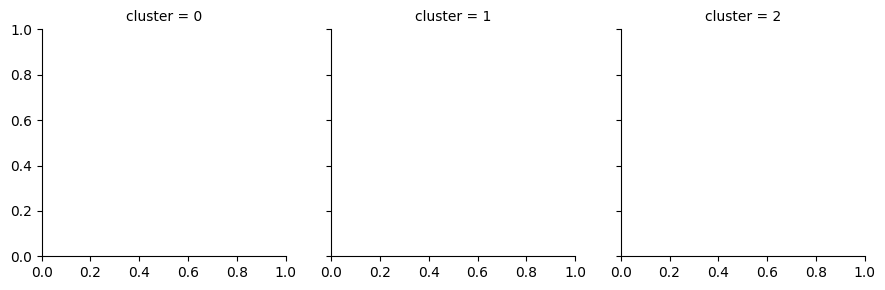

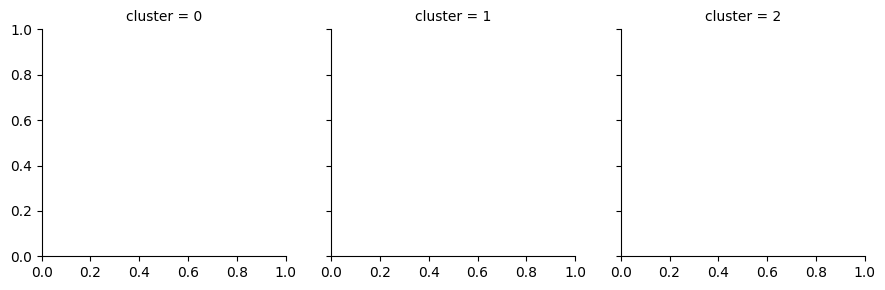

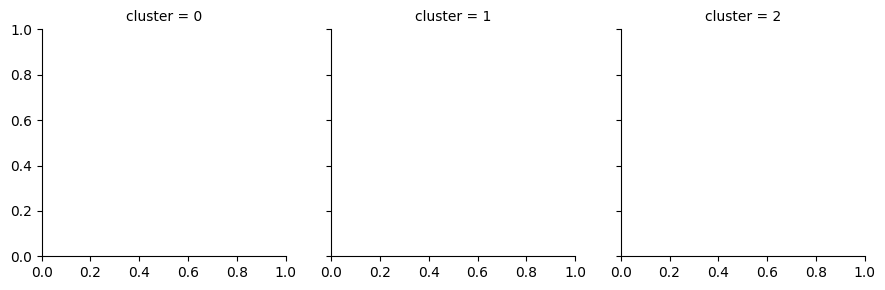

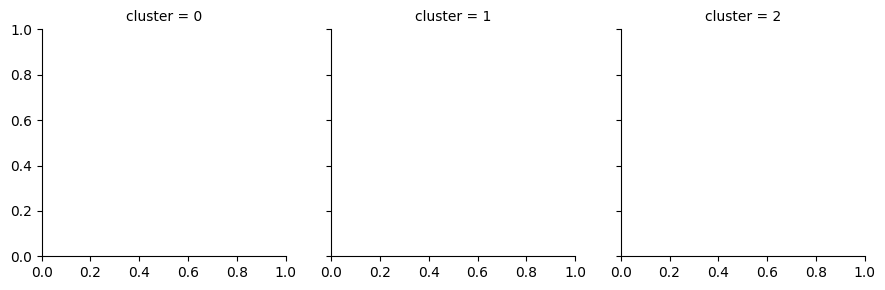

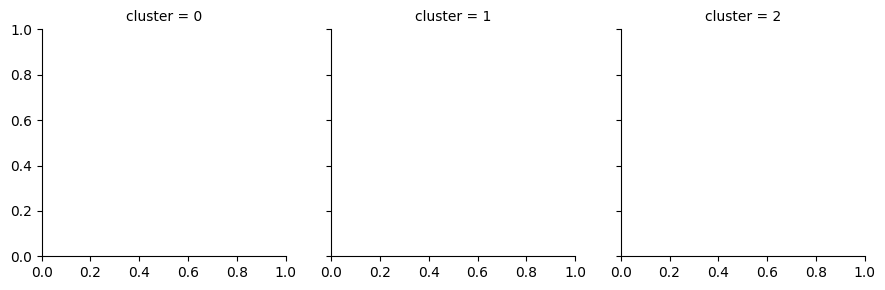

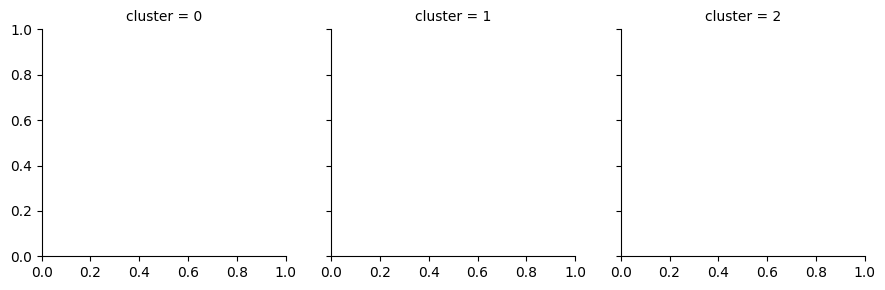

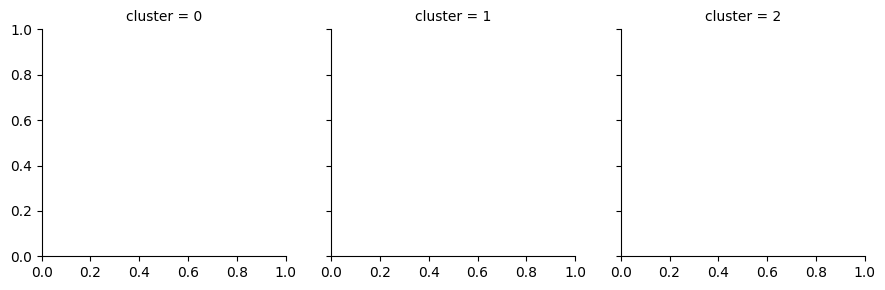

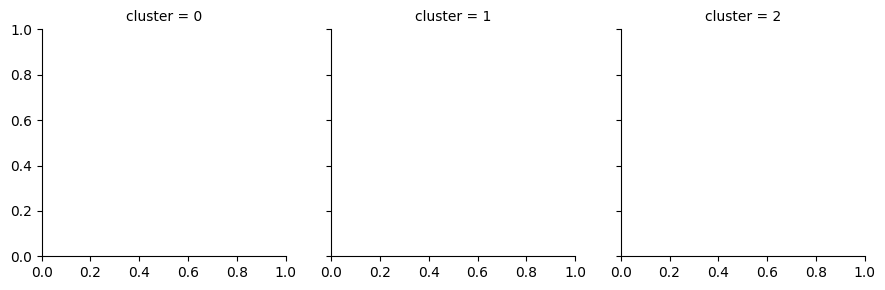

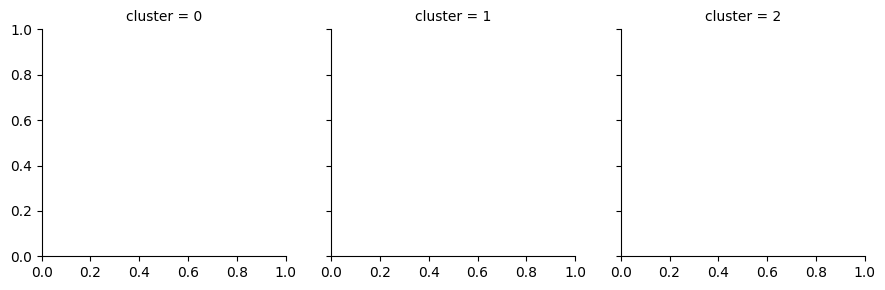

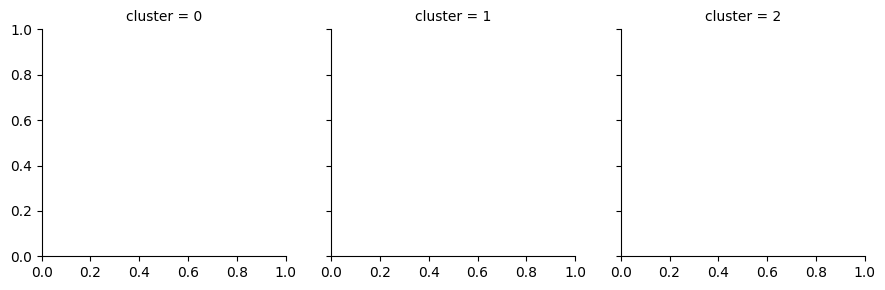

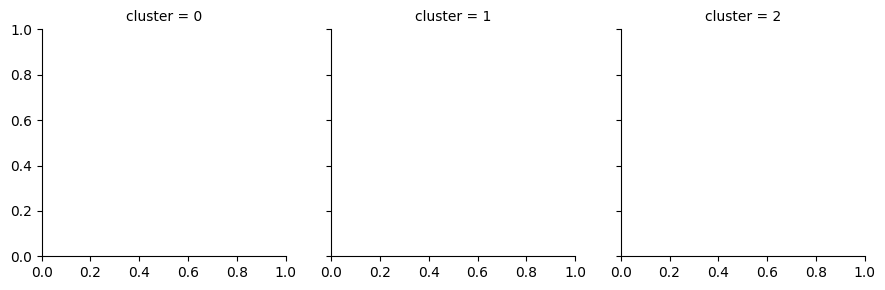

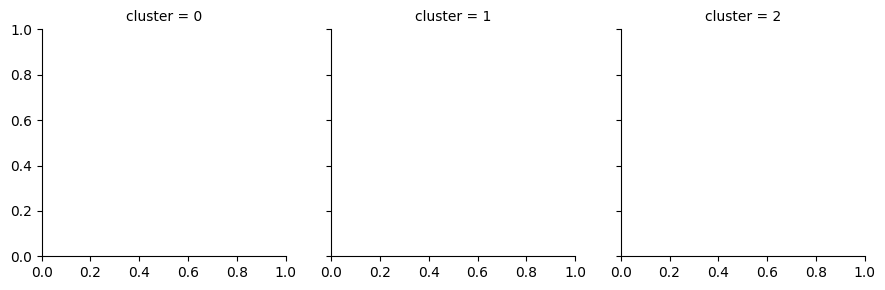

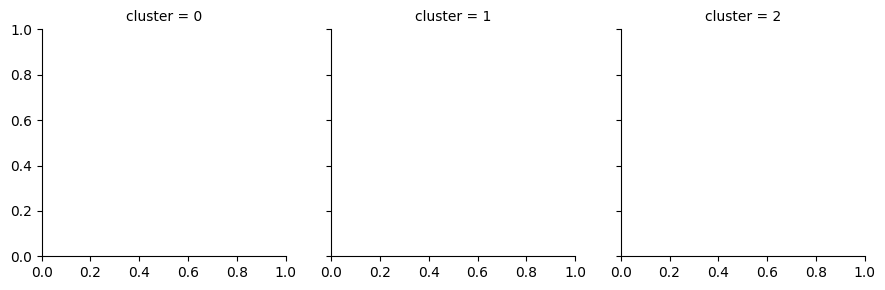

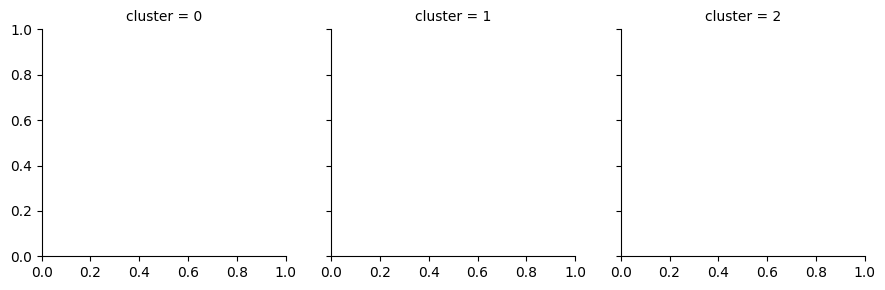

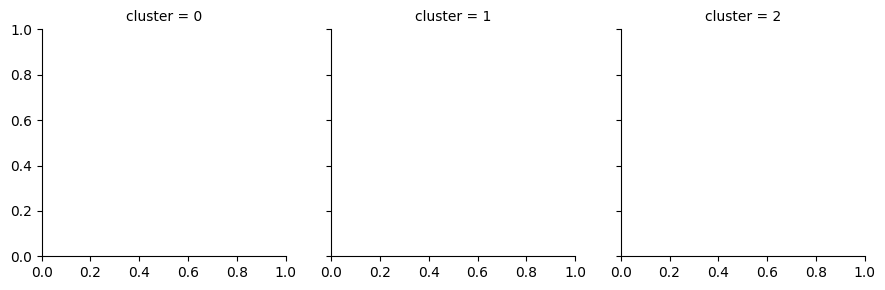

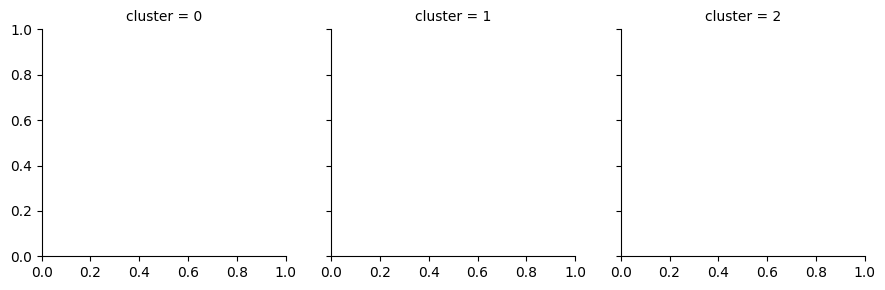

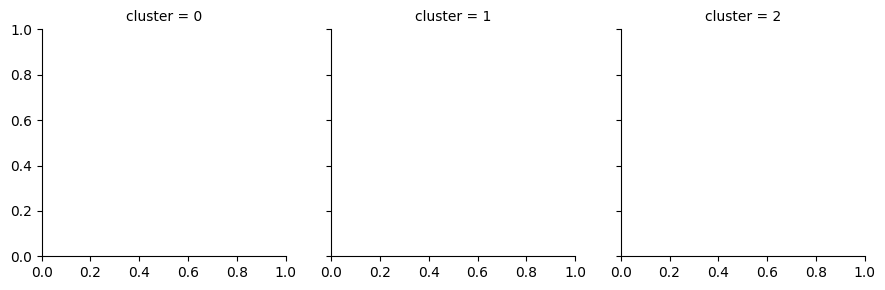

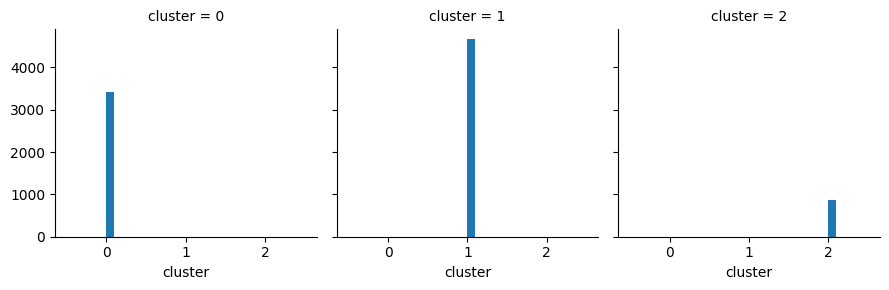

In [19]:
#visualisasi hasil agglomerative clustering
for i in hasil_agglo: grid = sns.FacetGrid(hasil_agglo, col='cluster')
grid.map(plt.hist, i)

In [23]:
#decomposisi PCA
dist = 1 - cosine_similarity(df)

pca = PCA(n_components=2)
pca = pca.fit_transform(dist)
#x_PCA.shape

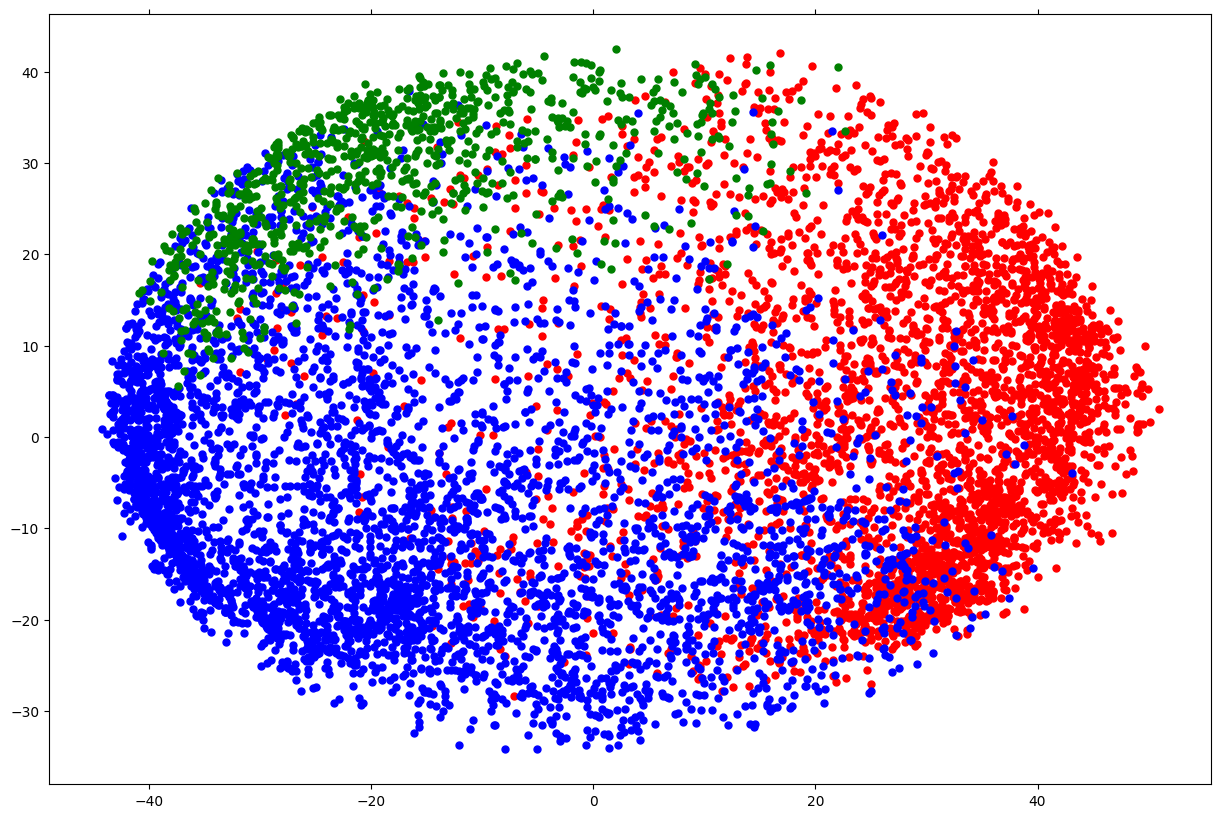

In [26]:
#visualisasi penyebaran agglomerative clustering
x,y = pca[:,0], pca[:,1]

warna = {0: 'red', 1:'blue', 2:'green'}

label_pca = {0: 'cluster 0', 1:'cluster 1', 2:'cluster 3'}
df = pd.DataFrame({'x':x, 'y':y, 'label':labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15,10))

for name, group in groups:ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=warna[name], label=label_pca[name=='none'])
ax.set_aspect('auto')
ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
ax.tick_params(axis='y', which='both', left='off', top='off', labelbottom='off')
